In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [129]:
car_prices = pd.read_csv("car prices.csv")
car_prices

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [130]:
car_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [131]:
car_prices.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [132]:
car_prices.drop("Market Category",axis=1,inplace=True)
# دي احنا شلناها خالص الباقس شلنا بس القيم الي مش موجودة

In [133]:
car_prices.dropna(inplace =True)
car_prices.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [134]:
car_prices.describe()


,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000,1.181200e+04
mean,2010.361581,249.504487,5.649424,3.432526,26.320945,19.328141,1553.679902,4.055994e+04
std,7.594647,109.206947,1.751646,0.882919,7.443589,6.527734,1440.067820,6.028413e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.099000e+04
50%,2015.000000,227.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.997000e+04
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.220500e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


<Axes: xlabel='MSRP', ylabel='Count'>

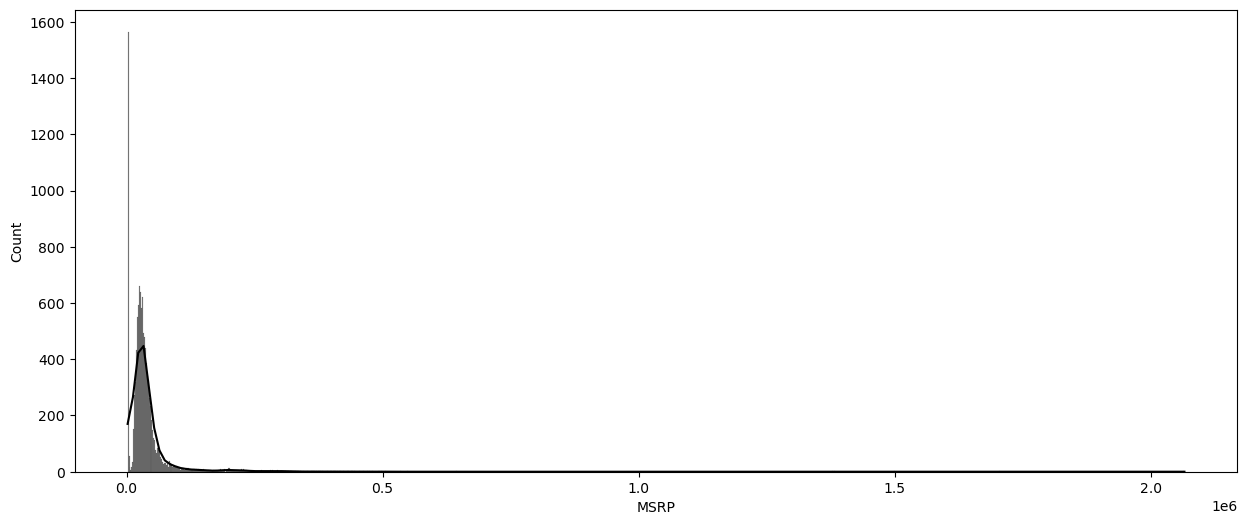

In [135]:
plt.figure(figsize=(15,6))
sns.histplot(car_prices["MSRP"],kde=True,color="black")

<Axes: xlabel='MSRP_log', ylabel='Count'>

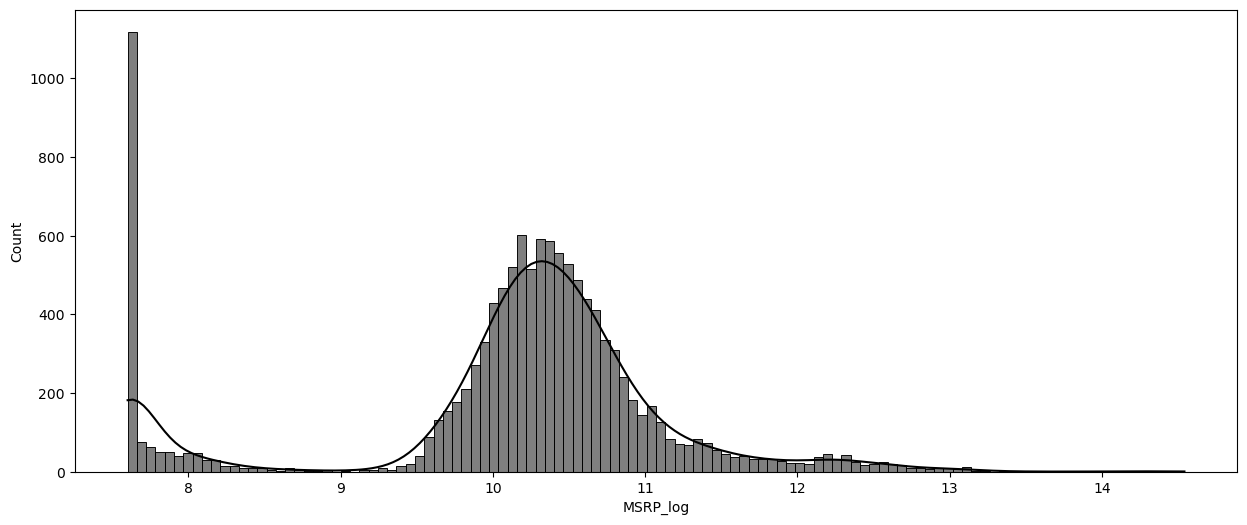

In [136]:
car_prices["MSRP_log"] =np.log(car_prices["MSRP"])
# we create new coloumn ليه عشان يسهل عليا لما اجي اشوف العلاقة بين السعر قبل ما يتحول وبقية الحجات 
plt.figure(figsize=(15,6))
sns.histplot(car_prices["MSRP_log"],kde=True,color="black")


<span style="color:purple">


***Logarithmic transformation***
 is a type of data transformation that replaces each variable x with a log(x). The choice of the logarithm base is usually e (natural logarithm), but you can also use 10 or 2, or any positive number.

Here’s how logarithmic transformation helps handle outliers:

**1-Reducing Skewness:** A logarithmic transformation can reduce skewness in the distribution of the data. 
Skewness is a measure of the **asymmetry** of the probability distribution. Outliers can make the distribution skewed. Logarithmic transformation can make the distribution more symmetric, which is a desirable property in many statistical analyses.(بترجعه للتوزيع الطبيعي زي المثال الي فوق دة )

**2 -Stabilizing Variance:** Logarithmic transformation can stabilize variance (i.e., make the variance constant across levels of the predictor variables). This is particularly useful in regression analysis, where one of the assumptions is that the variance of the residuals is constant across levels of the predictor variables.

**3-Normalizing the Data:** Logarithmic transformation can make the data more closely follow a normal distribution. This can improve the validity of measures of association such as correlation and regression.

***4-Compressing the Scale:** Outliers are extreme values that can be many 
***standard deviations away from the mean***. Logarithmic transformation compresses the scale(عشان كدة هو اتكلم عنها), so outliers have less effect on the statistical analysis.
However, it’s important to note that logarithmic transformation can only be applied to positive values. If your data **contains zero or negative values, you might need to shift the data before applying the logarithm**.

Also, after applying a logarithmic transformation, the interpretation of the data and the analysis changes. You’re now dealing with the ratios and multiplicative effects rather than the differences and additive effects
</span>


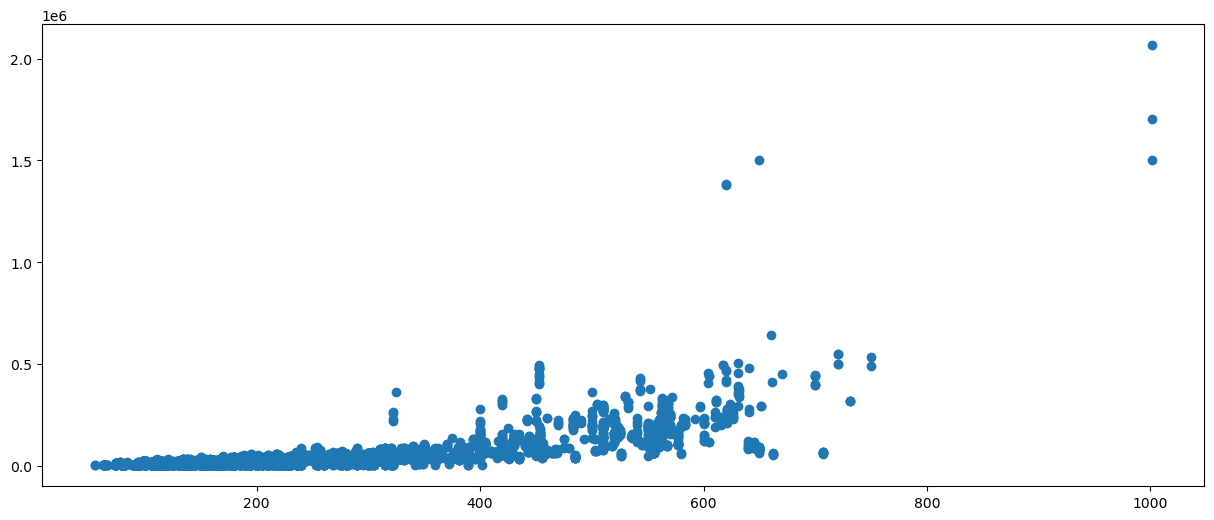

In [137]:
plt.figure(figsize=(15,6))
plt.scatter(car_prices["Engine HP"],car_prices["MSRP"])

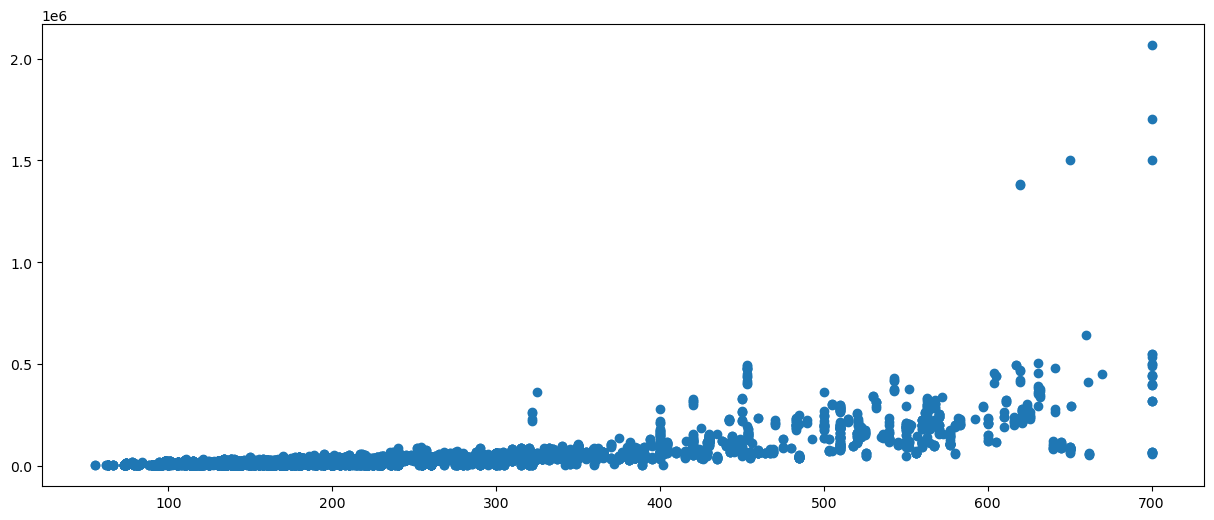

In [138]:
car_prices["Engine HP"] = np.where(car_prices["Engine HP"]>700,700,car_prices["Engine HP"])
plt.figure(figsize=(15,6))
plt.scatter(car_prices["Engine HP"],car_prices["MSRP"])


<Axes: xlabel='Engine Cylinders', ylabel='MSRP'>

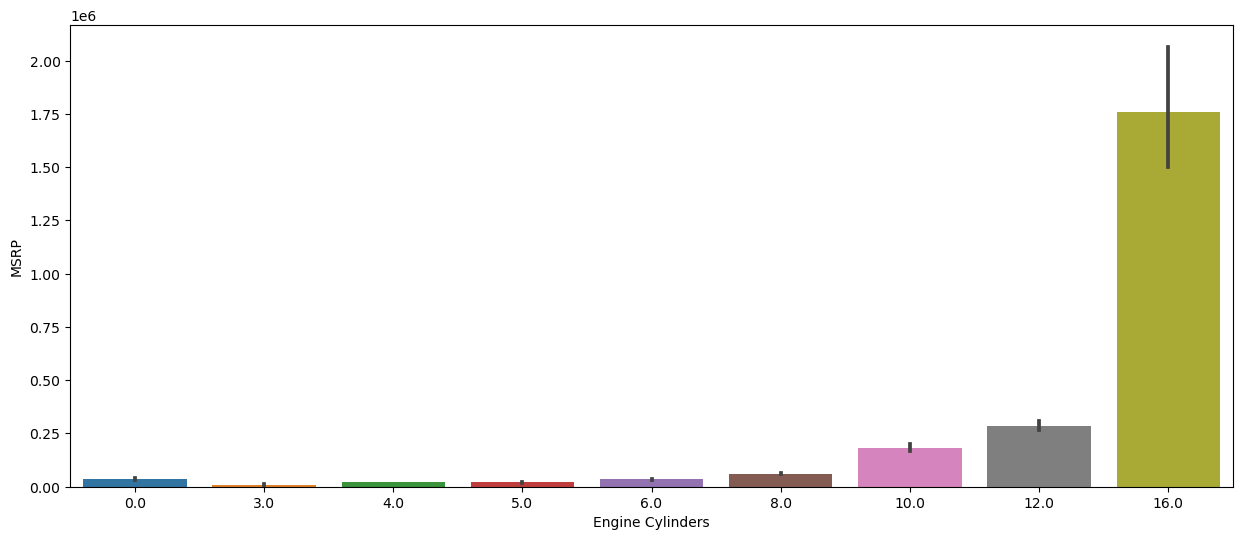

In [139]:
plt.figure(figsize=(15,6))
sns.barplot(x=car_prices["Engine Cylinders"],y=car_prices["MSRP"])

In [140]:
car_prices["Engine Cylinders"].value_counts().sort_index()

Engine Cylinders
0.0       13
3.0       30
4.0     4743
5.0      225
6.0     4470
8.0     2031
10.0      68
12.0     229
16.0       3
Name: count, dtype: int64

C:\Users\arwah\AppData\Local\Temp\ipykernel_12748\14806103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_prices["Engine Cylinders"] = np.where(car_prices["Engine Cylinders"]==16,12,car_prices["Engine Cylinders"])


<Axes: xlabel='Engine Cylinders', ylabel='MSRP'>

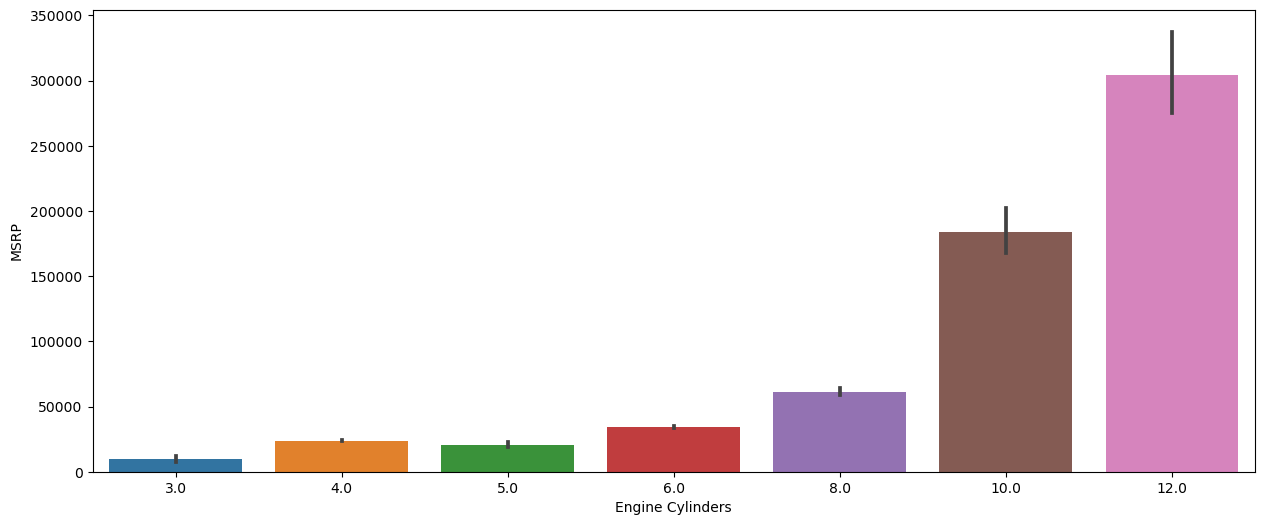

In [141]:
car_prices=car_prices[car_prices["Engine Cylinders"]!=0]
car_prices["Engine Cylinders"] = np.where(car_prices["Engine Cylinders"]==16,12,car_prices["Engine Cylinders"])
plt.figure(figsize=(15,6))
sns.barplot(x=car_prices["Engine Cylinders"],y=car_prices["MSRP"])

C:\Users\arwah\AppData\Local\Temp\ipykernel_12748\1317123270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_prices["Engine Cylinders"] = np.where(car_prices["Engine Cylinders"]==5,4,car_prices["Engine Cylinders"])


<Axes: xlabel='Engine Cylinders', ylabel='MSRP'>

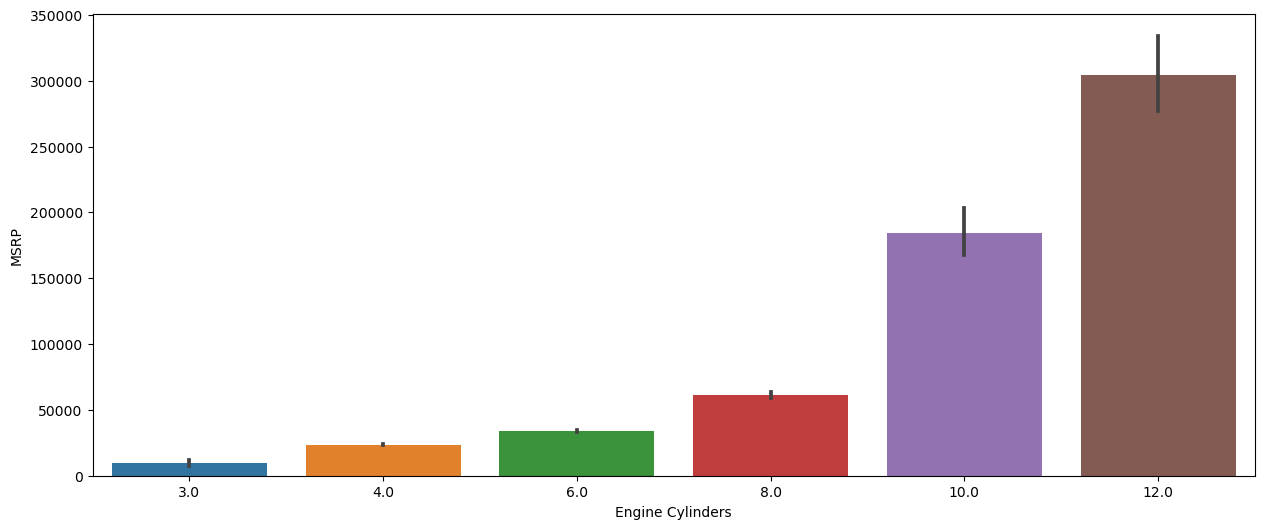

In [142]:
car_prices["Engine Cylinders"] = np.where(car_prices["Engine Cylinders"]==5,4,car_prices["Engine Cylinders"])
plt.figure(figsize=(15,6))
sns.barplot(x=car_prices["Engine Cylinders"],y=car_prices["MSRP"])

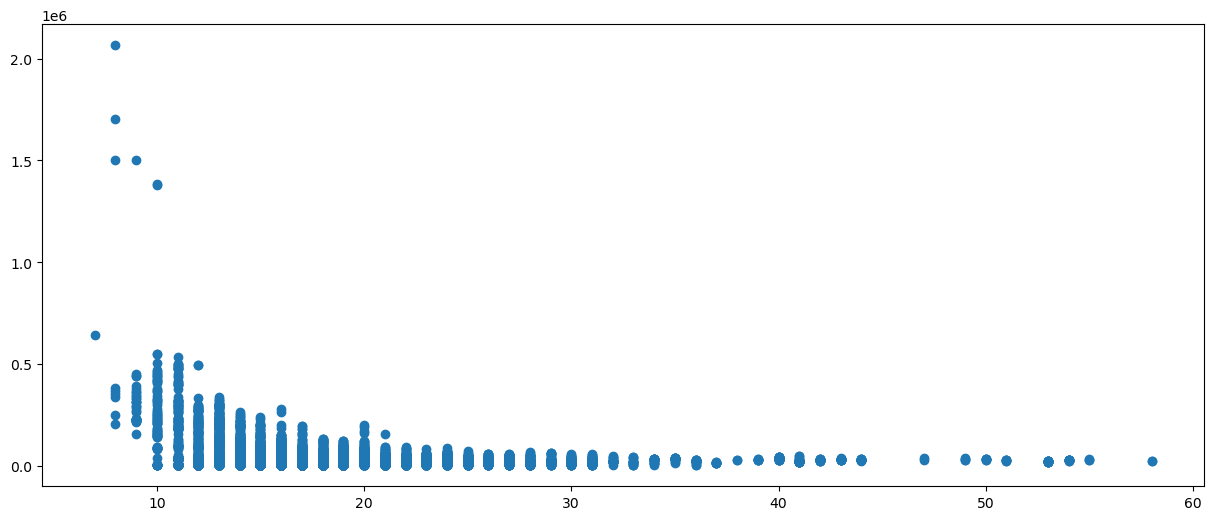

In [143]:
plt.figure(figsize=(15,6))
plt.scatter(car_prices["city mpg"],car_prices["MSRP"])

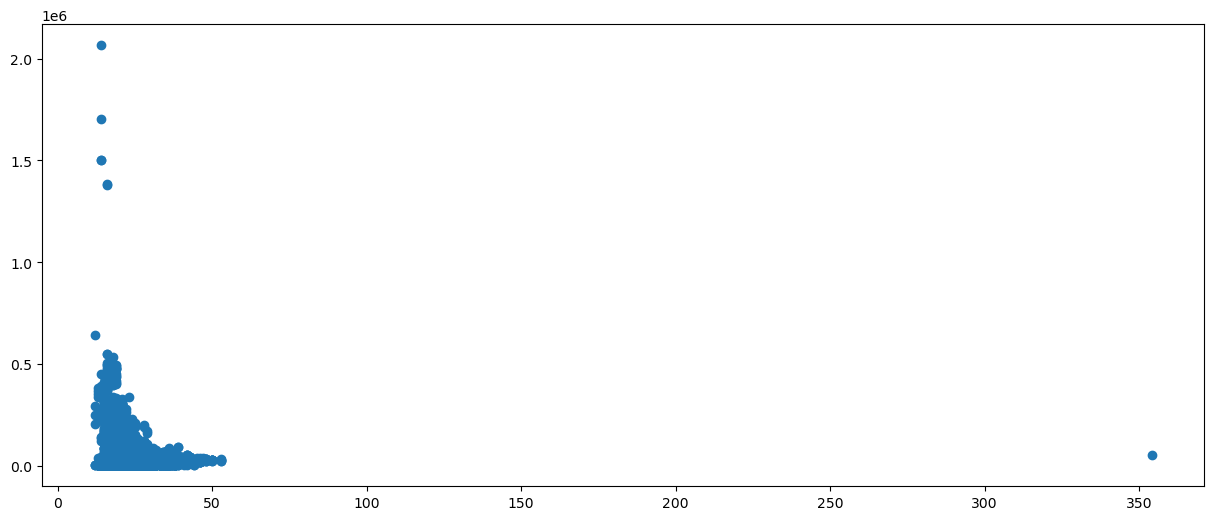

In [144]:
plt.figure(figsize=(15,6))
plt.scatter(car_prices["highway MPG"],car_prices["MSRP"])

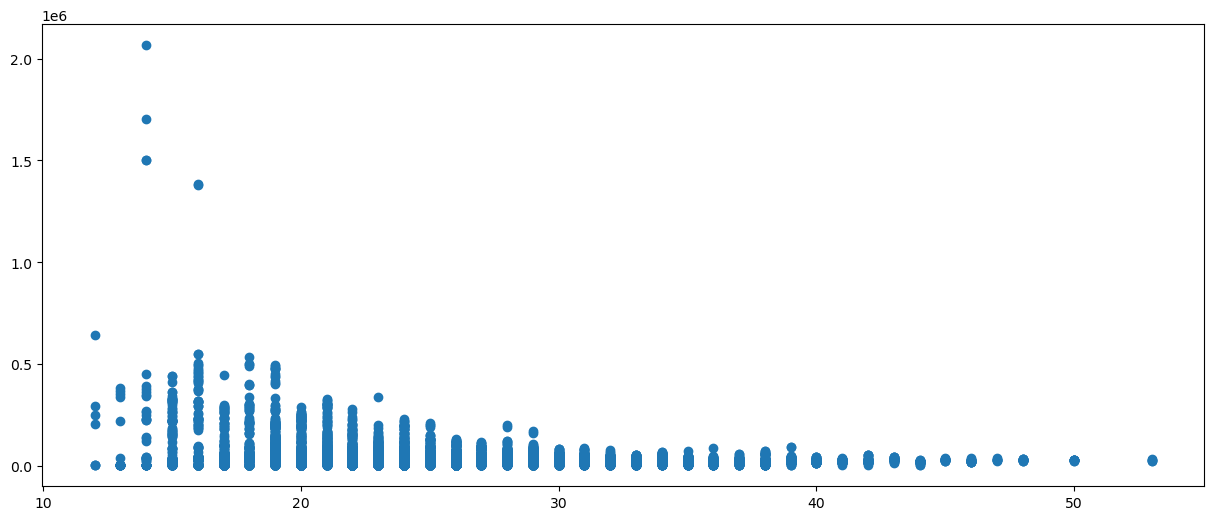

In [145]:
car_prices = car_prices[car_prices["highway MPG"]<100]
plt.figure(figsize=(15,6))
plt.scatter(car_prices["highway MPG"],car_prices["MSRP"])

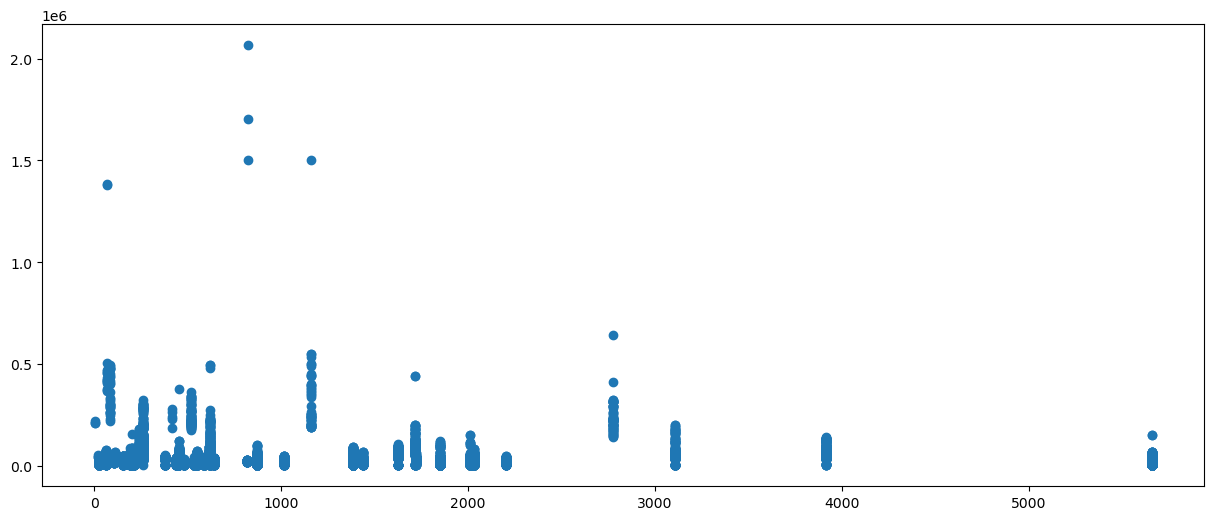

In [146]:
plt.figure(figsize=(15,6))
plt.scatter(car_prices["Popularity"],car_prices["MSRP"])

In [147]:
car_prices.corr(numeric_only=True)

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,MSRP_log
Year,1.000000,0.355520,-0.026664,0.262046,0.318106,0.258871,0.073274,0.227453,0.768481
Engine HP,0.355520,1.000000,0.780395,-0.100413,-0.478992,-0.530649,0.037301,0.643758,0.680381
Engine Cylinders,-0.026664,0.780395,1.000000,-0.134125,-0.686169,-0.683500,0.051028,0.531470,0.376421
Number of Doors,0.262046,-0.100413,-0.134125,1.000000,0.131504,0.147435,-0.050175,-0.127289,0.105937
highway MPG,0.318106,-0.478992,-0.686169,0.131504,1.000000,0.919980,-0.044442,-0.234448,-0.054951
city mpg,0.258871,-0.530649,-0.683500,0.147435,0.919980,1.000000,-0.021187,-0.262167,-0.105533
Popularity,0.073274,0.037301,0.051028,-0.050175,-0.044442,-0.021187,1.000000,-0.048687,-0.000637
MSRP,0.227453,0.643758,0.531470,-0.127289,-0.234448,-0.262167,-0.048687,1.000000,0.596119
MSRP_log,0.768481,0.680381,0.376421,0.105937,-0.054951,-0.105533,-0.000637,0.596119,1.000000


<Axes: >

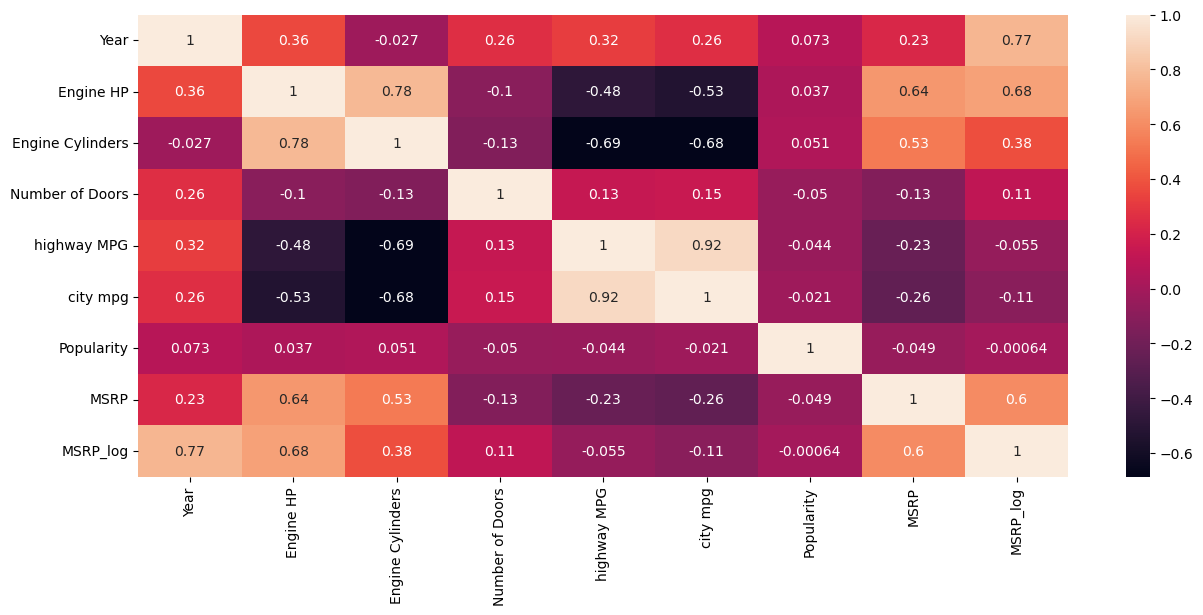

In [148]:
plt.figure(figsize=(15,6))
sns.heatmap(car_prices.corr(numeric_only=True),annot=True)

In [149]:
x = car_prices[["Year","Engine HP","Engine Cylinders"]]
y = car_prices["MSRP_log"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)
model =LinearRegression()
model.fit(x_train,y_train)
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))


0.7814540050005561
0.7903582350939515


# preprocessing for categorical data

In [150]:
car_prices.describe(include="object")

,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style
count,11798,11798,11798,11798,11798,11798,11798
unique,47,901,8,5,4,3,16
top,Chevrolet,Silverado 1500,regular unleaded,AUTOMATIC,front wheel drive,Compact,Sedan
freq,1109,156,7155,8231,4722,4695,3012


<Axes: xlabel='Vehicle Size', ylabel='MSRP'>

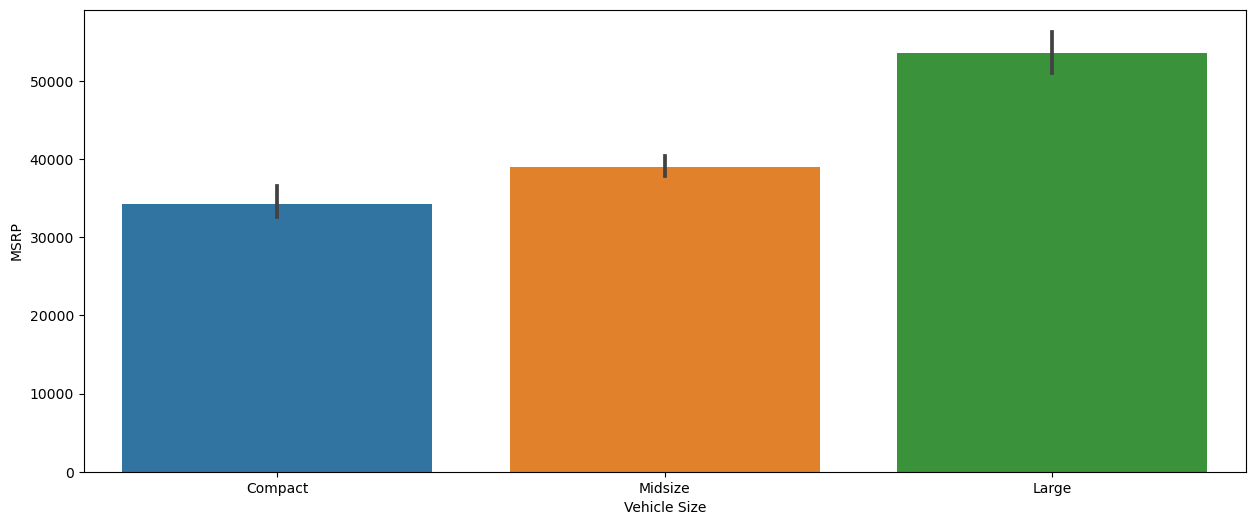

In [151]:
plt.figure(figsize=(15,6))
sns.barplot(x= car_prices["Vehicle Size"],y=car_prices["MSRP"])

<Axes: xlabel='Vehicle Size', ylabel='MSRP'>

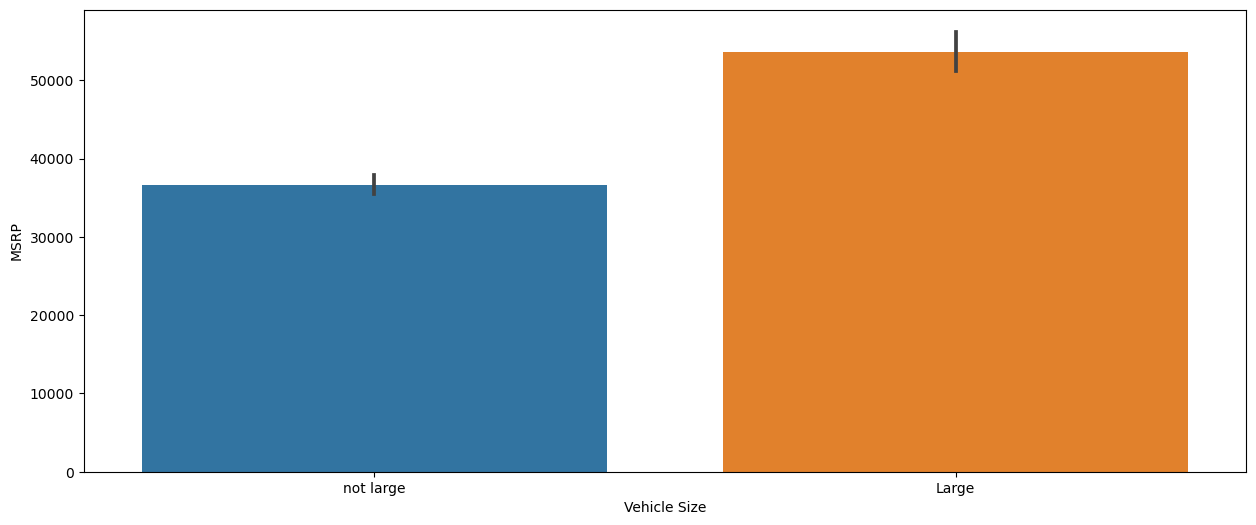

In [152]:
car_prices["Vehicle Size"] = np.where(car_prices["Vehicle Size"]=='Large','Large',"not large")
plt.figure(figsize=(15,6))
sns.barplot(x= car_prices["Vehicle Size"],y=car_prices["MSRP"])
# ايه out اللذيذ دة 

<Axes: xlabel='Driven_Wheels', ylabel='MSRP'>

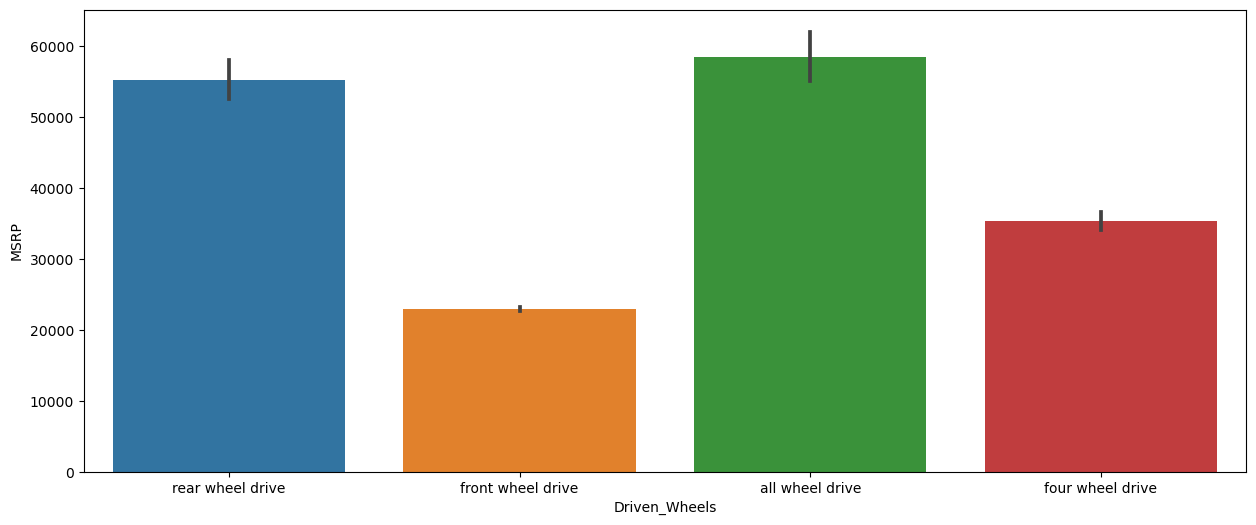

In [153]:
plt.figure(figsize=(15,6))
sns.barplot(x= car_prices["Driven_Wheels"],y=car_prices["MSRP"])

In [154]:
car_prices["Driven_Wheels"].value_counts()

Driven_Wheels
front wheel drive    4722
rear wheel drive     3337
all wheel drive      2336
four wheel drive     1403
Name: count, dtype: int64

<Axes: xlabel='Transmission Type', ylabel='MSRP'>

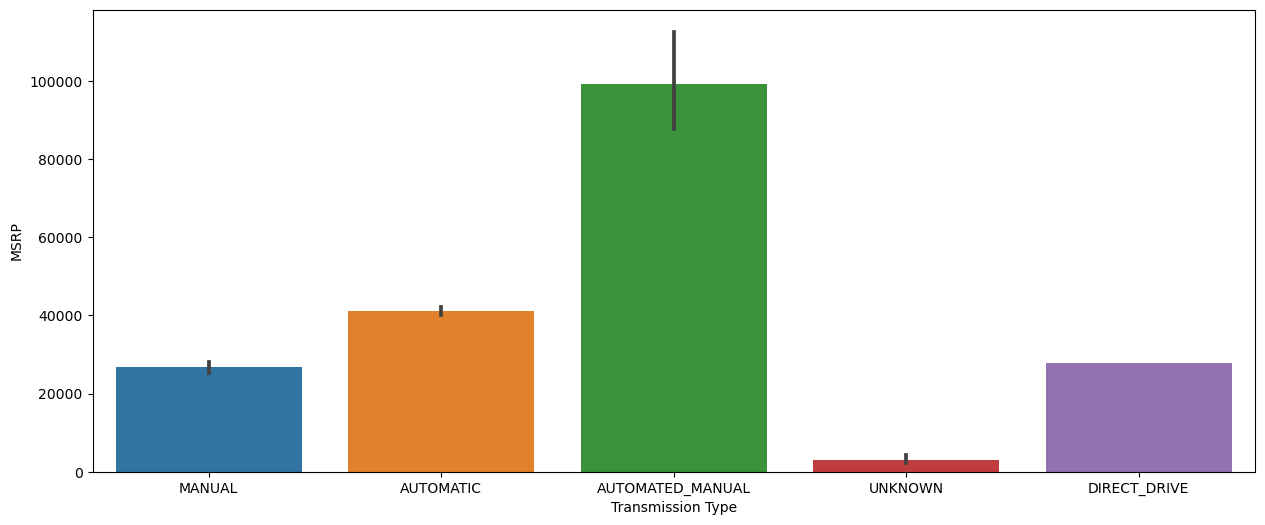

In [155]:
plt.figure(figsize=(15,6))
sns.barplot(x= car_prices["Transmission Type"],y=car_prices["MSRP"])

In [156]:
car_prices["Transmission Type"].value_counts()

Transmission Type
AUTOMATIC           8231
MANUAL              2922
AUTOMATED_MANUAL     624
UNKNOWN               19
DIRECT_DRIVE           2
Name: count, dtype: int64

<Axes: xlabel='Transmission Type', ylabel='MSRP'>

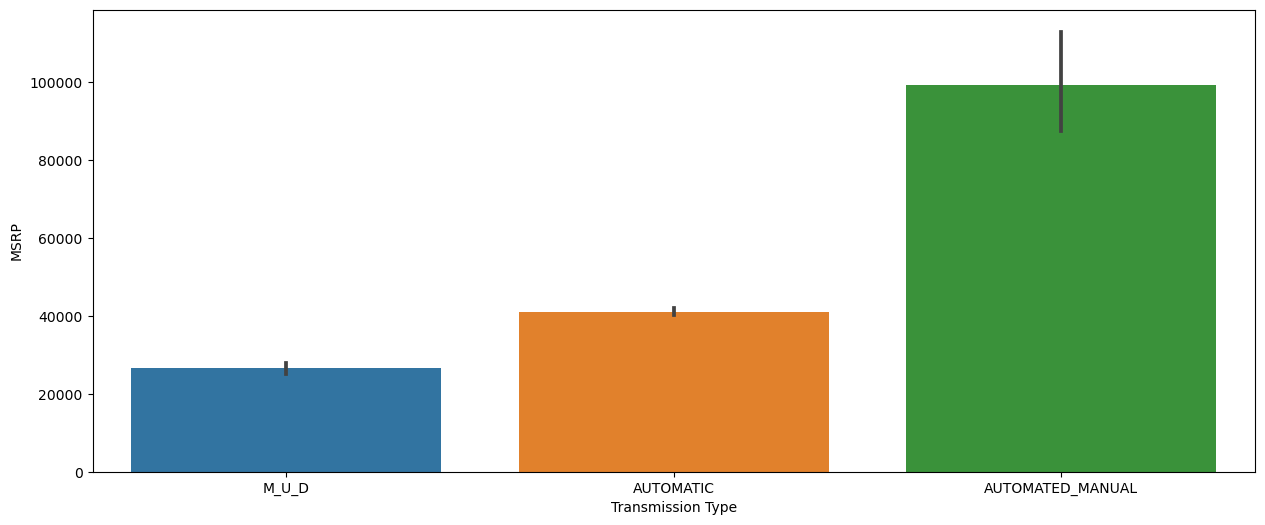

In [157]:
car_prices["Transmission Type"]=np.where(car_prices["Transmission Type"].isin(["MANUAL","UNKNOWN","DIRECT_DRIVE"]),"M_U_D",car_prices["Transmission Type"] )

plt.figure(figsize=(15,6))
sns.barplot(x= car_prices["Transmission Type"],y=car_prices["MSRP"])

<Axes: xlabel='Engine Fuel Type', ylabel='MSRP'>

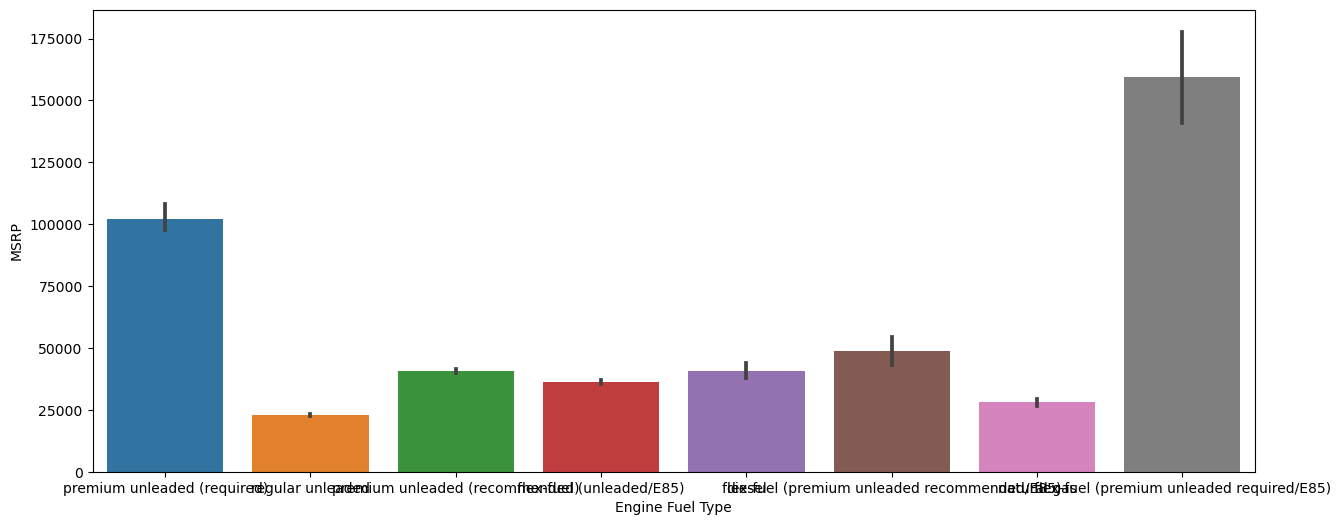

In [159]:
plt.figure(figsize=(15,6))
sns.barplot(x= car_prices["Engine Fuel Type"],y=car_prices["MSRP"])

In [158]:
car_prices["Engine Fuel Type"].value_counts()

Engine Fuel Type
regular unleaded                                7155
premium unleaded (required)                     1991
premium unleaded (recommended)                  1518
flex-fuel (unleaded/E85)                         899
diesel                                           153
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
natural gas                                        2
Name: count, dtype: int64

<Axes: xlabel='Engine Fuel Type', ylabel='MSRP'>

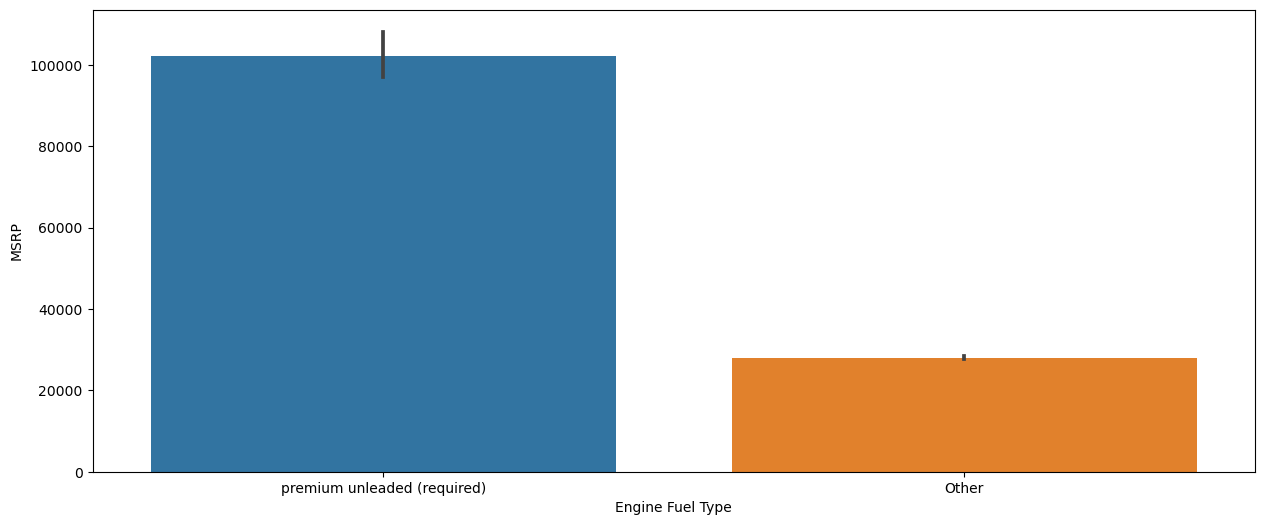

In [161]:
car_prices["Engine Fuel Type"] = np.where(car_prices["Engine Fuel Type"]=="premium unleaded (required)","premium unleaded (required)","Other")
plt.figure(figsize=(15,6))
sns.barplot(x= car_prices["Engine Fuel Type"],y=car_prices["MSRP"])